# Gradient descent principles

## Gradient descent methods 

### A simple quadratic function

First of all we define the gradient of the function that is going to be studied:

In [1]:
def grad_fun1(point):
    return 2*point

Given an initial point, our aim is to try and find the minimum by performing a descent guided by the gradient calculated after each iteration:

$$x^{k+1}= x^k - \alpha^k \nabla f(x^k)$$

Therefore, what we do is define a function named *grad_desc* that takes the gradient of a function and performs a gradient descent given an initial point, a constant alpha and a number of iterations:

In [2]:
import pandas as pd
point = pd.Series([0,5])

def grad_desc(fun,point, max_iter = 101,alpha = 0.1): # max_iter=101 coz range() stops at max_iter-1
    x = []
    for i in range(0,max_iter):
        x.append(point.tolist())
        point = point - alpha*fun(point)
    return x

Now, let's see how different starting points eventually find the minimum and let's draw them. Our parameters are: \

Number of iterations: 100.\
Steps $\alpha^k$: 0.1, 0.9, 1, 1.1 and 2. \
Starting points $x^0$: (0, 50), (50, -50) and (-75, 0).
 

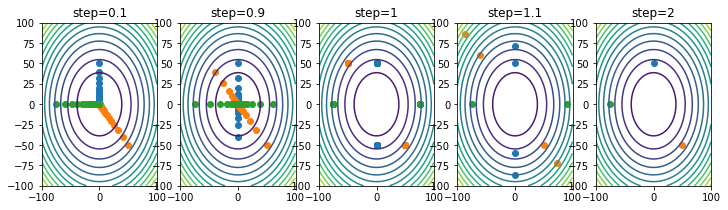

In [3]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np


# Function to analyze

x = np.arange(-100,100,0.5)
y = np.arange(-100,100,0.5)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2 

# Vector of steps to use
steps = [0.1, .9, 1, 1.1, 2]

# List to record all the paths
paths = []

# Loop for computing and plotting paths
plt.figure(figsize=(12, 3))
for i, stepi in enumerate(steps):
    descents = []
    descents.append(grad_desc(grad_fun1,pd.Series([0,50]), alpha=stepi))
    descents.append(grad_desc(grad_fun1,pd.Series([50,-50]), alpha=stepi))
    descents.append(grad_desc(grad_fun1,pd.Series([-75,0]), alpha=stepi))
    paths.append(descents)
    
    subpl = "1" + str(len(steps)) + str(i+1)  
    plt.subplot(subpl)
    plt.title("step=" + str(stepi))
    plt.axis([-100,100,-100,100]) #have to put this right before a given plot for it to work
    #plt.axis('equal')#-> leaves part of the frame of the figure blank, so I commented it out
    plt.contour(X, Y, Z, 15)

    # Different points plot: el método de antes no estaba dibujando los puntos del grad desc, 
    # pq plt no admite datos en ese formato. Hay que ponerlos en plan:
    # "lista_con_coords_x, lista_con_coords_y", y "zip" parece funcionar pa eso (merci Stack Overflow XD).

    # Además, como me parece interesante plotear puntos en vez de líneas por ver cómo evolu-
    #ciona el algoritmo (se ve que los pasos son más pequeños según se acerca, pq el grad 
    # tiende a 0), he cambiado "plpt" por "scatter".

    plt.scatter(*zip(*descents[0]))   
    plt.scatter(*zip(*descents[1]))
    plt.scatter(*zip(*descents[2]))
    #plt.plot(descents[0][0],descents[0][1])
    #plt.plot(descents[1][0],descents[1][1])
    #plt.plot(descents[2][0],descents[2][1])


#plt.axis('equal')
plt.show()



We observe in the figures above (where different colours represent the path from the three different starting points) that the method does converge to the analytically-known minimun (0,0) for $\alpha^k<1$ (although the order of the points is not obvious from the plots, we have trivially verified such is the case from the list "paths", where we record the paths for every step size and from every initial point).
\
For $\alpha^k>=1$, however, we already see in the gradient descent formula that, given the specific gradient of our function, the algorithm cannot ever converge. Indeed, as soon as $\alpha^k=1$, the algorithm will just take the opposite of the initial point in the direction of the gradient, constantly shifting between $x^0$ and $-x^0$, and if $\alpha^k>1$ each inversion will take us ever further away from the minimum (as can be seen from the plots, and we have verified in "paths").\
From the above discussion, we confirm that for (and only for) $\alpha^k<1$ the algorithm converges to the minimum within a given precision, and that the more iterations we perform, the closer we get to such a point, because even if a new point surpasses it, it will invariably be nearer to it than its predecessor. 

### A more complex function

Let's plot the new function to get an idea of what we're looking for:

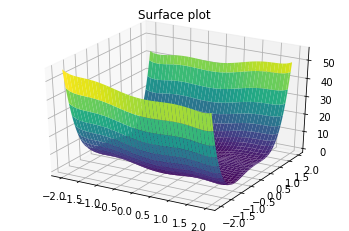

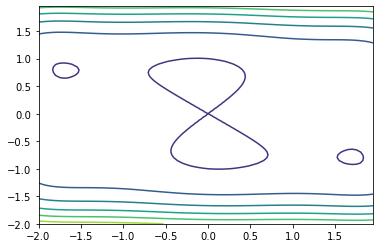

In [4]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

# Function to analyze

X = np.arange(-2, 2, 0.05)
Y = np.arange(-2, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z = X**2*(4-2.1*X**2 + 1/3*X**4) + X*Y + Y**2*(-4 + 4*Y**2) 

# Contour plot en 2D

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, Z,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

plt.figure()
plt.contour(X, Y, Z, 5)
plt.show()

It looks like we have 4 different local minima. Let's see how the gradient descent method fares with this. First, we define the gradient of this second function:

In [22]:
def grad_fun2(point):
    x = point[0]
    y = point[1]
    gradx = 2*x*(x**4 - 4.2*x**2 + 4) + y
    grady = 8*y*(2*y**2 - 1) + x
    grad = pd.Series([gradx, grady])
    return grad

And now we can proceed as in the previous exercise. Our parameters are: \

Number of iterations: 100.\
Steps $\alpha^k$: 0.01 and 0.1. \
Starting points $x^0$: (-2, 1), (0, -1), (-0.5, 0.5) and (1.5, -0.5).

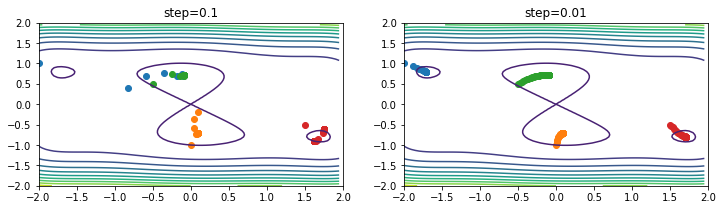

In [6]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np


# Function to analyze

X = np.arange(-2, 2, 0.05)
Y = np.arange(-2, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z = X**2*(4-2.1*X**2 + 1/3*X**4) + X*Y + Y**2*(-4 + 4*Y**2) 


# Vector of steps to use
steps = [0.1, 0.01#, .9, 1, 1.1, 2
        ]

# List to record all the paths
paths2 = []

# Loop for computing and plotting paths
plt.figure(figsize=(12, 3))
for i, stepi in enumerate(steps):
    descents = []
    descents.append(grad_desc(grad_fun2,pd.Series([-2,1]), alpha=stepi))
    descents.append(grad_desc(grad_fun2,pd.Series([0,-1]), alpha=stepi))
    descents.append(grad_desc(grad_fun2,pd.Series([-0.5,0.5]), alpha=stepi))
    descents.append(grad_desc(grad_fun2,pd.Series([1.5,-0.5]), alpha=stepi))
    paths2.append(descents)
    
    subpl = "1" + str(len(steps)) + str(i+1)  
    plt.subplot(subpl)
    plt.title("step=" + str(stepi))
    plt.axis([-2,2,-2,2]) #have to put this right before a given plot for it to work
    #plt.axis('equal')#-> leaves part of the frame of the figure blank, so I commented it out
    plt.contour(X, Y, Z, 10)

    plt.scatter(*zip(*descents[0]))   
    plt.scatter(*zip(*descents[1]))
    plt.scatter(*zip(*descents[2]))
    plt.scatter(*zip(*descents[3]))


#plt.axis('equal')
plt.show()



As predicted in the assignment, the minimum found depends on the initial point. For step sizes such as $\alpha^k = 0.1$, the behaviour is less predictable (because 0.1 is only one order of magnitude below the scale of the region populated by the minima, hence allowing for abrupt changes in position), but for small enough ones (such as 0.01) we see that the algorithm converges to the nearest minimum.

Now let us redefine the gradient descent function to implement the convergence condition, $||\nabla f (x^k)|| < 10^{-5}$, and the back-tracking algorithm for adjusting the step (i.e. if proposed $x^{k+1}$ does not yield a lower value of $f$ than $x^k$, halve the step $\alpha^k$ and recompute $x^{k+1}$). The default step is $\alpha^k = 1$.

**We still have to implement the counting of the iterations to compare with the constant-step trials (for which we would also have to measure when they satisfy the gradient condition). Also, we should find the minima analytically to check that convergence is actually happening.**

In [67]:
def grad_desc_improved(fun, grad, x0):
    x = []
    x.append(x0.tolist())
    xk = x0
    while np.linalg.norm(grad(xk)) >= 10**-5:
        alpha=1
        xkplus1 = xk - alpha*grad(xk)
        while fun(xkplus1)>=fun(xk):
            alpha = alpha/2
            xkplus1 = xk - alpha*grad(xk)
        xk = xkplus1  
        x.append(xk.tolist())
    return x

def complicated_fun(point):
    x = point[0]
    y = point[1]
    z = x**2*(4-2.1*x**2 + 1/3*x**4) + x*y + y**2*(-4 + 4*y**2) 
    return z

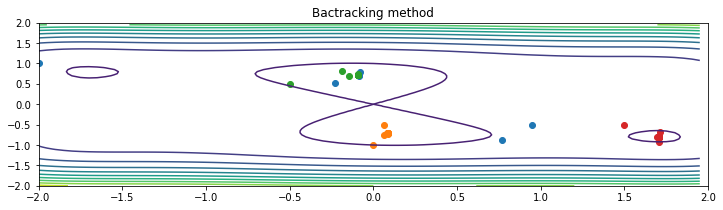

In [71]:
%matplotlib inline

import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

# Function to analyze
X = np.arange(-2, 2, 0.05)
Y = np.arange(-2, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z = X**2*(4-2.1*X**2 + 1/3*X**4) + X*Y + Y**2*(-4 + 4*Y**2) 


# Vector of initial points
x0a = pd.Series([-2,1])
x0b = pd.Series([0,-1])
x0c = pd.Series([-0.5,0.5])
x0d = pd.Series([1.5,-0.5])
x0s = [x0a, x0b, x0c, x0d]

# Loop for computing and plotting paths
plt.figure(figsize=(12, 3))
plt.title("Bactracking method")
plt.axis([-2,2,-2,2]) #have to put this right before a given plot for it to work
plt.contour(X, Y, Z, 10)

# List to record all the paths (BT from BackTracking)
pathsBT = []

#grad_desc_improved(complicated_fun, grad_fun2,x0a)


for x0 in x0s:
        descent = grad_desc_improved(complicated_fun, grad_fun2,x0)
        pathsBT.append(descent)
        #print(descents)
        plt.scatter(*zip(*descent))   

plt.show()



There are seemingly less iterations before convergence, but the blue dots appear to roam a little.

### The Rosenbrock function

## Newton descent method

### A simple quadratic function

Again, we define the gradient of the function suggested, $f(x) = 100x_1^2 + x_2^2$:

$$ \nabla f(x) = (200x_1 , 2x_2)$$

In [2]:
def grad_fun4(point):
    return pd.Series([200*point[0],2*point[1]])

### A more complex function

### The Rosenbrock function